In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the data
tr=pd.read_csv("loan-train.csv")

In [3]:
tr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
tr.shape

(614, 13)

In [5]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
tr.isnull().sum() #checking null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#filling the rows which have any null records
tr['Gender'].fillna(tr['Gender'].mode()[0],inplace=True)
tr['Married'].fillna(tr['Married'].mode()[0],inplace=True)
tr['Dependents'].fillna(tr['Dependents'].mode()[0],inplace=True)
tr['Self_Employed'].fillna(tr['Self_Employed'].mode()[0],inplace=True)
tr.LoanAmount=tr.LoanAmount.fillna(tr.LoanAmount.mean())
tr['Credit_History'].fillna(tr['Credit_History'].mode()[0],inplace=True)
tr['Loan_Amount_Term'].fillna(tr['Loan_Amount_Term'].mode()[0],inplace=True)

In [8]:
tr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
tr.shape

(614, 13)

<Axes: >

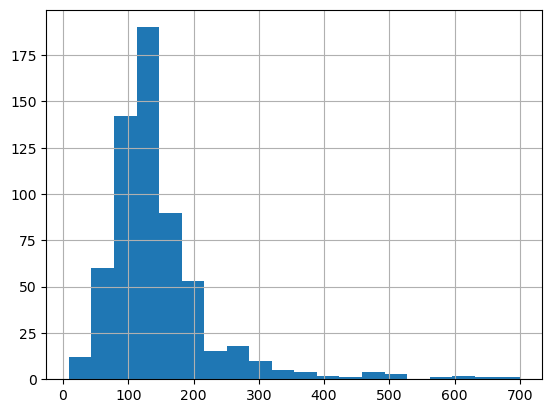

In [10]:
tr['LoanAmount'].hist(bins=20)

<Axes: >

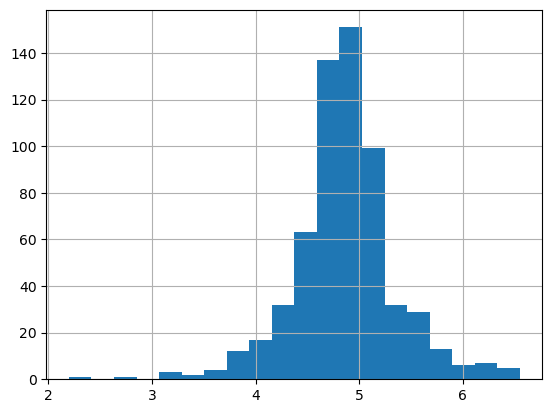

In [11]:
tr['LoanAmount_log']=np.log(tr['LoanAmount'])
tr['LoanAmount_log'].hist(bins=20)

<Axes: >

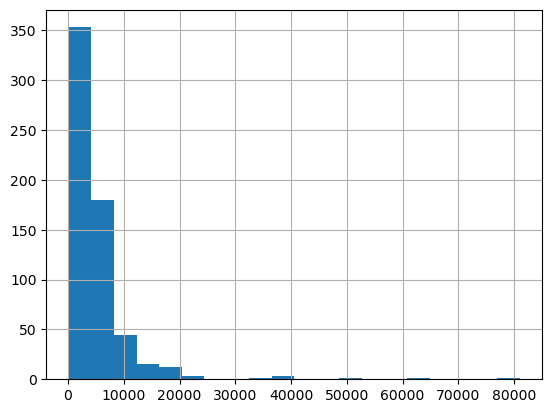

In [12]:
tr['ApplicantIncome'].hist(bins=20)

<Axes: >

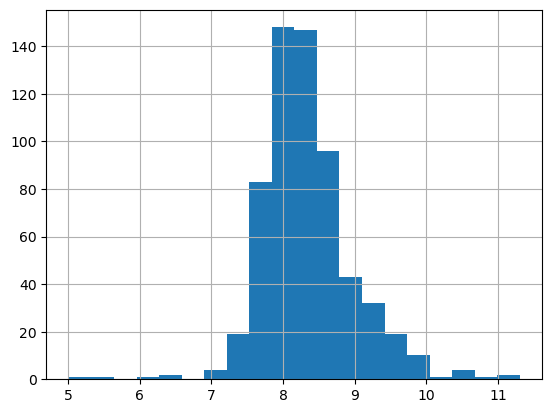

In [13]:
tr['ApplicantIncome_log']=np.log(tr['ApplicantIncome'])
tr['ApplicantIncome_log'].hist(bins=20)

<Axes: >

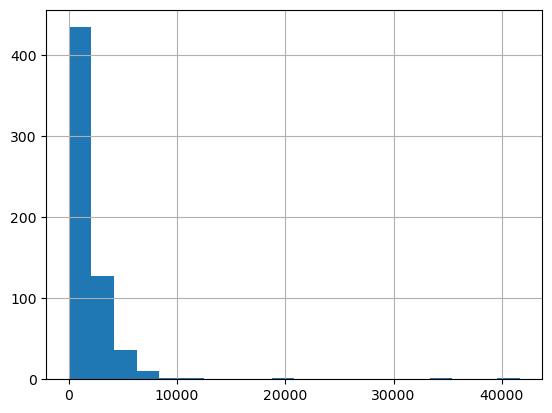

In [14]:
tr['CoapplicantIncome'].hist(bins=20)

In [15]:
tr['Totalincome']=tr['ApplicantIncome']+tr['CoapplicantIncome']
tr['Totalincome_log']=np.log(tr['Totalincome'])

<Axes: >

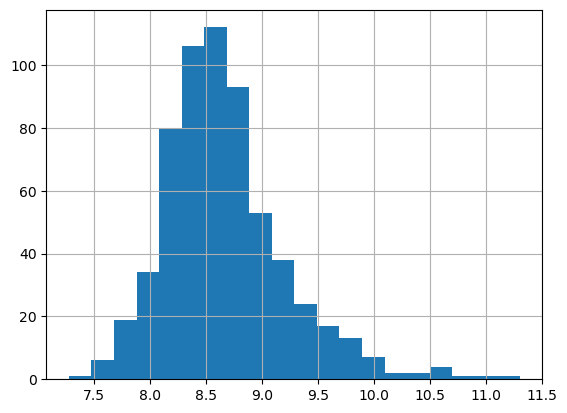

In [16]:
tr['Totalincome_log'].hist(bins=20)

In [17]:
# counting different values of all colimns
def explore_object_type(tr ,feature_name):   
    if tr[feature_name].dtype ==  'object':
        print(tr[feature_name].value_counts())

In [18]:
explore_object_type(tr, 'Gender')

Male      502
Female    112
Name: Gender, dtype: int64


In [19]:
explore_object_type(tr, 'Married')

Yes    401
No     213
Name: Married, dtype: int64


In [20]:
explore_object_type(tr, 'Dependents')

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [21]:
explore_object_type(tr, 'Education')

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


In [22]:
explore_object_type(tr, 'Self_Employed')

No     532
Yes     82
Name: Self_Employed, dtype: int64


In [23]:
explore_object_type(tr, 'Property_Area')

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [24]:
explore_object_type(tr, 'Loan_Status')

Y    422
N    192
Name: Loan_Status, dtype: int64


In [25]:
 #checking eligibility with crosstab
pd.crosstab(tr['Credit_History'],tr['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


# Applicants with credit history with 1.0 are more eligible than applicants with credit history with 0.0

<Axes: >

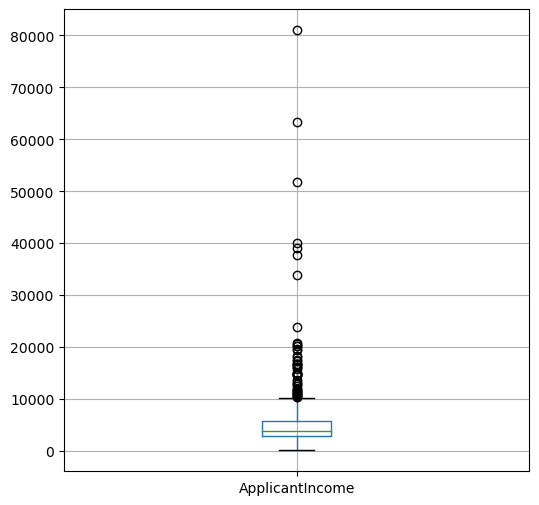

In [26]:
plt.figure(figsize=(6, 6))
tr.boxplot(column='ApplicantIncome')

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

<Figure size 600x600 with 0 Axes>

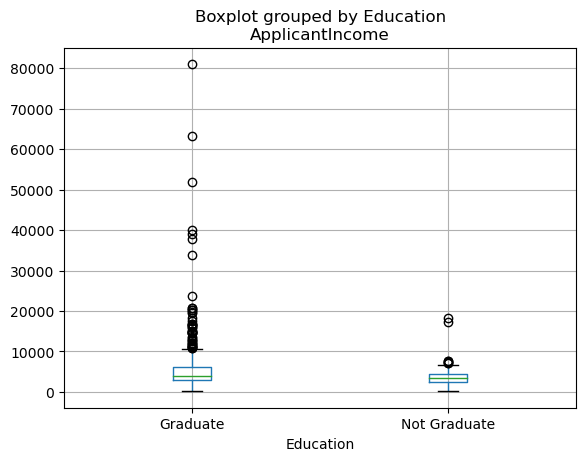

In [27]:
plt.figure(figsize=(6, 6))
tr.boxplot(column='ApplicantIncome',by='Education')

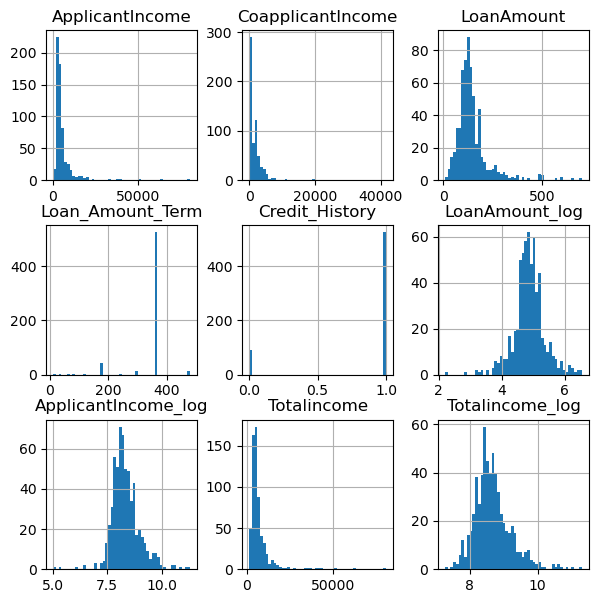

In [28]:
tr.hist(bins= 50, figsize= (7,7))
plt.show()

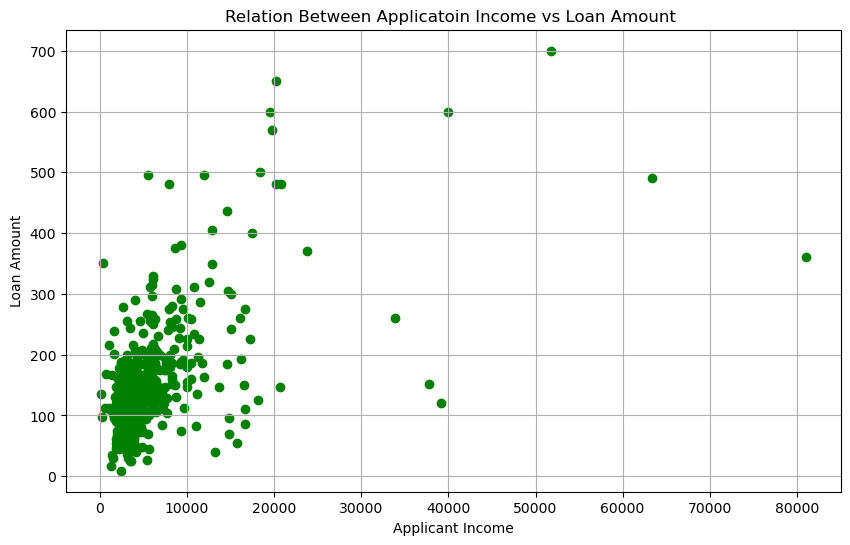

In [29]:
plt.figure(figsize=(10, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")
plt.grid()
plt.scatter(tr['ApplicantIncome'] , tr['LoanAmount'], color='g')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

C:\Users\varun\AppData\Local\Temp\ipykernel_1844\2866492620.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tr.corr(),annot=True,  fmt='0.1f', linewidths=.1)


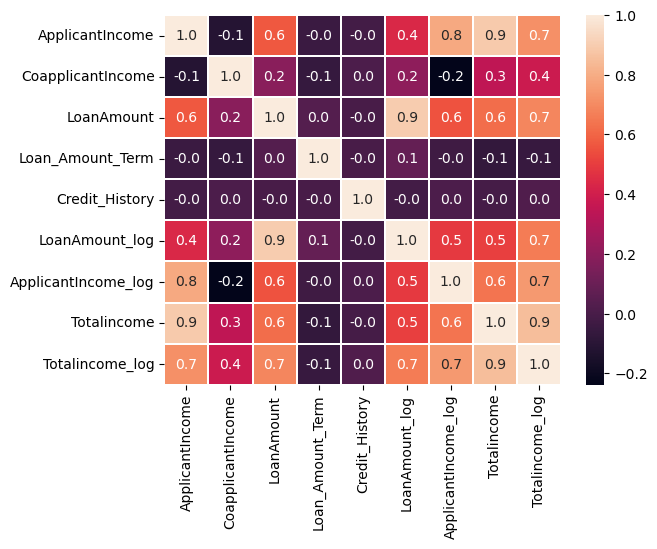

In [30]:
import seaborn as sns
sns.heatmap(tr.corr(),annot=True,  fmt='0.1f', linewidths=.1)
plt.show()

# Machine learn prgraming 

In [31]:
tr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,Totalincome,Totalincome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,8.674026,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,8.430109,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,8.006368,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,7.856707,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,8.699515,6000.0,8.699515


In [32]:
tr.shape

(614, 17)

In [33]:
#dependent(y)and independent(x)variebles
x=tr.iloc[:,np.r_[1:5,9:11,13:17]].values
y=tr.iloc[:,12].values

In [34]:
x

array([['Male', 'No', '0', ..., 8.674025985443025, 5849.0,
        8.674025985443025],
       ['Male', 'Yes', '1', ..., 8.430109084509125, 6091.0,
        8.714567550836485],
       ['Male', 'Yes', '0', ..., 8.006367567650246, 3000.0,
        8.006367567650246],
       ...,
       ['Male', 'Yes', '1', ..., 8.996156562033445, 8312.0,
        9.025455532779063],
       ['Male', 'Yes', '2', ..., 8.933664178700935, 7583.0,
        8.933664178700935],
       ['Female', 'No', '0', ..., 8.430109084509125, 4583.0,
        8.430109084509125]], dtype=object)

In [35]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# test_size=0.3  shows 30% train and 70% test, random_state=0  0 shows that result accuracy is consistant 

In [37]:
print(x_train)

[['Male' 'No' '0' ... 9.07680897935166 12917.0 9.466299552232016]
 ['Male' 'Yes' '0' ... 8.258163361537619 7159.0 8.876125585396185]
 ['Male' 'Yes' '0' ... 7.783224016336037 4567.0 8.426611813185]
 ...
 ['Male' 'Yes' '3+' ... 8.550047528287184 8334.0 9.0280988119824]
 ['Male' 'Yes' '0' ... 8.704999678440762 6033.0 8.704999678440762]
 ['Female' 'Yes' '0' ... 8.338066525518801 6486.0 8.777401286867264]]


In [38]:
# need to convert x and y data in numeric

In [39]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [40]:
for i in range (0,5):
    x_train[:,i]=LabelEncoder_x.fit_transform(x_train[:,i])

In [41]:
x_train[:,7]=LabelEncoder_x.fit_transform(x_train[:,7])

In [42]:
x_train

array([[1, 0, 0, ..., 327, 12917.0, 9.466299552232016],
       [1, 1, 0, ..., 184, 7159.0, 8.876125585396185],
       [1, 1, 0, ..., 51, 4567.0, 8.426611813185],
       ...,
       [1, 1, 3, ..., 256, 8334.0, 9.0280988119824],
       [1, 1, 0, ..., 283, 6033.0, 8.704999678440762],
       [0, 1, 0, ..., 206, 6486.0, 8.777401286867264]], dtype=object)

In [43]:
LabelEncoder_y = LabelEncoder()
y_train=LabelEncoder_y.fit_transform(y_train)

In [44]:
y_train

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [45]:
for i in range (0,5):
    x_test[:,i]=LabelEncoder_x.fit_transform(x_test[:,i])

In [46]:
x_test[:,7]=LabelEncoder_x.fit_transform(x_test[:,7])
x_test

array([[1, 0, 0, ..., 142, 7085.0, 8.865735152124781],
       [0, 0, 0, ..., 98, 4230.0, 8.349957272040324],
       [1, 1, 0, ..., 134, 10039.0, 9.214232786691527],
       ...,
       [0, 1, 0, ..., 57, 3166.0, 8.060224240440958],
       [1, 1, 0, ..., 63, 3250.0, 8.086410275323782],
       [1, 0, 0, ..., 112, 4895.0, 8.49596955496461]], dtype=object)

In [47]:
y_test=LabelEncoder_y.fit_transform(y_test)

In [48]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [50]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
y_pred = DTClassifier.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1])

In [52]:
from sklearn import metrics
print("The accuracy of the decision tree is :",metrics.accuracy_score(y_pred,y_test))

The accuracy of the decision tree is : 0.7891891891891892


In [53]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(x_train,y_train)

GaussianNB()

In [54]:
y_pred = NBClassifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
print("The accuracy of the Naive Bayes is :",metrics.accuracy_score(y_pred,y_test))

The accuracy of the Naive Bayes is : 0.8216216216216217


In [56]:
ts=pd.read_csv("loan-test.csv")

In [57]:
ts.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [58]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [59]:
ts.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [60]:
#filling the rows which have any null records
ts['Gender'].fillna(ts['Gender'].mode()[0],inplace=True)
ts['Married'].fillna(ts['Married'].mode()[0],inplace=True)
ts['Dependents'].fillna(ts['Dependents'].mode()[0],inplace=True)
ts['Self_Employed'].fillna(ts['Self_Employed'].mode()[0],inplace=True)

In [61]:
ts['LoanAmount_log']=np.log(ts['LoanAmount'])

In [62]:
ts['ApplicantIncome_log']=np.log(ts['ApplicantIncome'])

C:\Users\varun\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [63]:
ts['Loan_Amount_Term_log']=np.log(ts['Loan_Amount_Term'])

In [64]:
ts['Totalincome']=ts['ApplicantIncome']+ts['CoapplicantIncome']
ts['Totalincome_log']=np.log(ts['Totalincome'])

In [65]:
ts.LoanAmount=ts.LoanAmount.fillna(ts.LoanAmount.mean())
ts['Credit_History'].fillna(ts['Credit_History'].mode()[0],inplace=True)
ts['Loan_Amount_Term'].fillna(ts['Loan_Amount_Term'].mode()[0],inplace=True)

In [66]:
ts.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
LoanAmount_log          5
ApplicantIncome_log     0
Loan_Amount_Term_log    6
Totalincome             0
Totalincome_log         0
dtype: int64

In [74]:
ts['LoanAmount_log'].fillna(ts['LoanAmount_log'].mode()[0],inplace=True)
ts['Loan_Amount_Term_log'].fillna(ts['Loan_Amount_Term_log'].mode()[0],inplace=True)

In [75]:
ts.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log,Loan_Amount_Term_log,Totalincome,Totalincome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,8.651724,5.886104,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,8.031385,5.886104,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,8.517193,5.886104,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,7.757906,5.886104,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,8.094378,5.886104,3276,8.094378


In [76]:
ts.shape

(367, 17)

In [77]:
test=ts.iloc[:,np.r_[1:5,9:11,13:17]].values

In [78]:
for i in range (0,5):
    test[:,i]=LabelEncoder_x.fit_transform(test[:,i])

In [79]:
test[:,6]=LabelEncoder_x.fit_transform(test[:,6])
test

array([[1, 1, 0, ..., 5.886104031450156, 5720, 8.651724084373843],
       [1, 1, 1, ..., 5.886104031450156, 4576, 8.428580533059634],
       [1, 1, 2, ..., 5.886104031450156, 6800, 8.824677891164198],
       ...,
       [1, 0, 0, ..., 5.886104031450156, 5243, 8.564649132572534],
       [1, 1, 0, ..., 5.886104031450156, 7393, 8.9082888855571],
       [1, 0, 0, ..., 5.19295685089021, 9200, 9.126958763037132]],
      dtype=object)

In [80]:
test = ss.fit_transform(test)

In [82]:
pred=NBClassifier.predict(test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [83]:
loan_eligibility=pd.DataFrame({"Loan_ID":ts["Loan_ID"],"Loan_Status":pred})

In [84]:
loan_eligibility 

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [85]:
loan_eligibility["Loan_Status"].replace(0,"N",inplace=True)
loan_eligibility["Loan_Status"].replace(1,"Y",inplace=True)

In [86]:
loan_eligibility

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [88]:
loan_eligibility.to_csv("loan_eligibility_output.csv",index=False)